## 1. 한글 자연어 처리 기초

* pip install KoNLPy
* pip install wordcloud
* pip install gensim
* conda install -c conda-forge jpype1

#### 1-1 Kkma분석

In [2]:
from konlpy.tag import Kkma
kkma = Kkma()

In [3]:
kkma.sentences('한국어 분석을 시작합니다 재미있어요~~')

['한국어 분석을 시작합니다', '재미있어요~~']

In [4]:
kkma.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석']

In [5]:
kkma.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

#### 1-2 Hannanum 분석

In [7]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [8]:
hannanum.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [9]:
hannanum.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있', '어요', '~~']

In [10]:
hannanum.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~~', 'S')]

#### 1-3 Twitter 분석

In [12]:
from konlpy.tag import Twitter
t = Twitter()

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [13]:
t.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [14]:
t.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '합니다', '재미있어요', '~~']

In [15]:
t.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재미있어요', 'Adjective'),
 ('~~', 'Punctuation')]

## 2. 워드 클라우드 

#### 2-1 앨리스

In [16]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [21]:
text = open("C:/Users/Yeji/Downloads/09. alice.txt").read()
alice_mask = np.array(Image.open("C:/Users/Yeji/Downloads/09. alice_mask.png"))

stopwords = set(STOPWORDS)
stopwords.add('said')

In [18]:
import matplotlib.pyplot as plt
import platform

%matplotlib inline 

from matplotlib import font_manager, rc
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

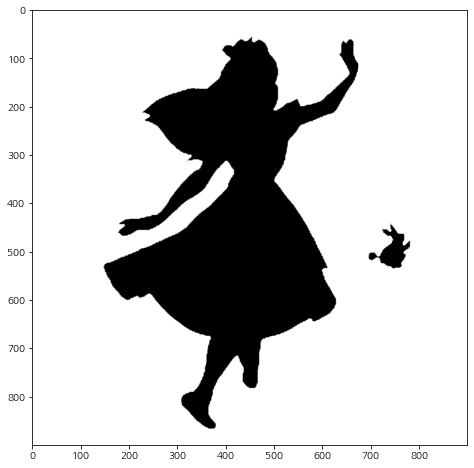

In [19]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.show()

In [22]:
wc = WordCloud(background_color = 'white', max_words=2000, mask = alice_mask,
              stopwords=stopwords)
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'little': 0.29508196721311475,
 'one': 0.27595628415300544,
 'know': 0.2459016393442623,
 'went': 0.226775956284153,
 'thing': 0.2185792349726776,
 'time': 0.2103825136612022,
 'Queen': 0.20765027322404372,
 'see': 0.1830601092896175,
 'King': 0.17486338797814208,
 'well': 0.1721311475409836,
 'now': 0.16393442622950818,
 'head': 0.16393442622950818,
 'began': 0.15846994535519127,
 'way': 0.1557377049180328,
 'Hatter': 0.1557377049180328,
 'Mock Turtle': 0.15300546448087432,
 'say': 0.15027322404371585,
 'Gryphon': 0.15027322404371585,
 'think': 0.1448087431693989,
 'quite': 0.14207650273224043,
 'much': 0.13934426229508196,
 'first': 0.13934426229508196,
 'thought': 0.1366120218579235,
 'go': 0.1366120218579235,
 'come': 0.13114754098360656,
 'never': 0.1284153005464481,
 'voice': 0.12568306010928962,
 'looked': 0.12295081967213115,
 'got': 0.12295081967213115,
 'must': 0.12021857923497267,
 'Cat': 0.12021857923497267,
 'Duchess': 0.11475409836065574,
 'Mouse': 0.11202

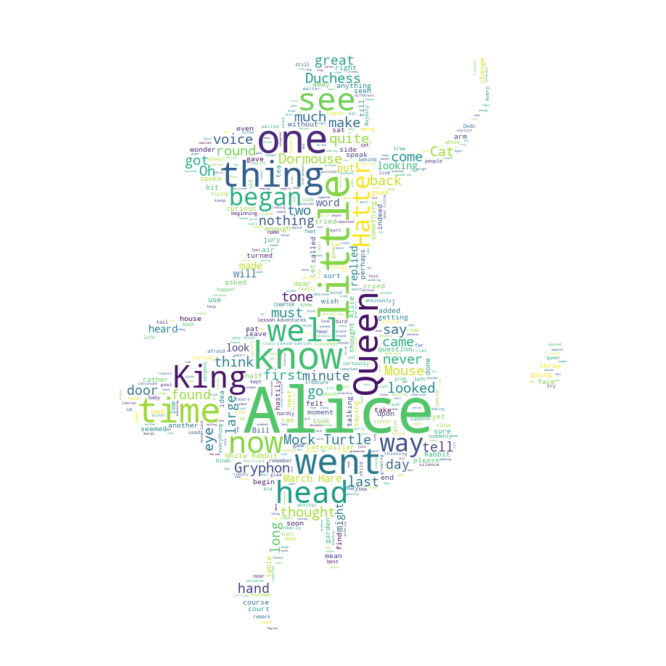

In [24]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### 2-2 스타워즈

In [25]:
text = open("C:/Users/Yeji/Downloads/09. a_new_hope.txt").read()

text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", "Luke")

mask = np.array(Image.open("C:/Users/Yeji/Downloads/09. stormtrooper_mask.png"))

In [26]:
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

In [27]:
wc = WordCloud(max_words=1000, mask = mask, stopwords = stopwords, margin=10, 
               random_state=1).generate(text)

default_colors=wc.to_array()

In [30]:
import random
def grey_color_func(word, font_size, position, orientation, random_state=None,
                   **kwargs):
    return 'hsl(0, 9%%, %d%%)' %random.randint(60,100)

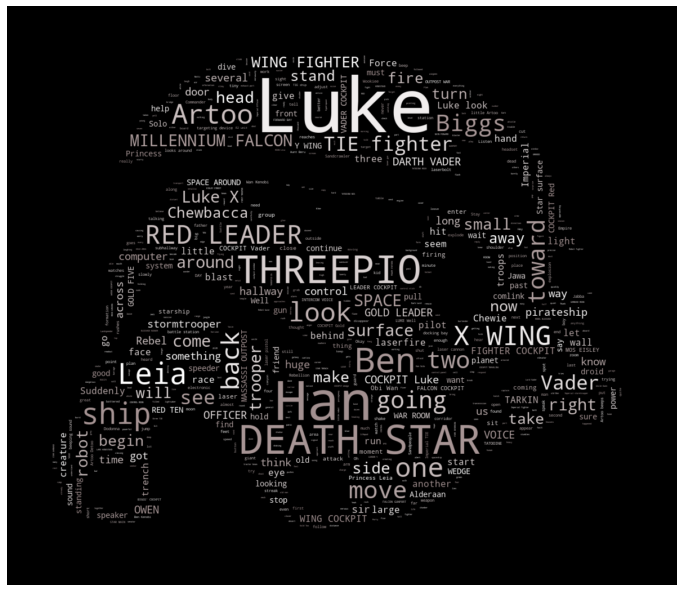

In [31]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func = grey_color_func, random_state=3), 
          interpolation='bilinear')
plt.axis('off')
plt.show()

## 3. 육아휴직 관련 법안에 대한 분석

In [32]:
import nltk
from konlpy.corpus import kobill

files_fo = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()

In [33]:
doc_ko

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

In [34]:
t = Twitter()
tokens_ko = t.nouns(doc_ko)
tokens_ko

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '만',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '만',
 '세',
 '이하',
 '개정',
 '것임',
 '안',
 '제',
 '항제',
 '호',
 '법률',
 '제',
 '호',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '호',
 '중',
 '만',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '만',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '의',
 '자녀',
 '로',
 '부',
 '칙',
 '이',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '안',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '

In [35]:
ko = nltk.Text(tokens_ko, name="대한민국 국회 의안 제 1809890호")

print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()

735
250


FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

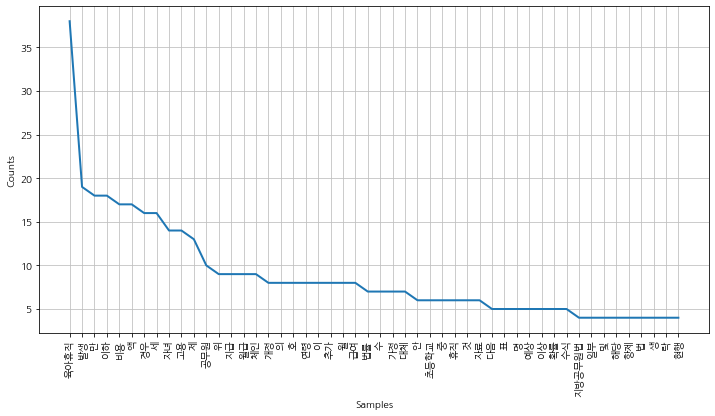

In [36]:
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

In [37]:
#stopwords 지정

stop_words=['.', '(', ')', ',', "'", '%', '-', 'X', ').', '×','의','자','에','안','번',
                      '호','을','이','다','만','로','가','를']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '정의화',
 '의원',
 '대표',
 '발의',
 '발의',
 '연월일',
 '발',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '세',
 '이하',
 '개정',
 '것임',
 '제',
 '항제',
 '법률',
 '제',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '중',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '자녀',
 '부',
 '칙',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '하나',
 '해당',
 '사유',
 '직',
 '임용',
 '휴직',
 '명',
 '수',
 '다만',
 '제',
 '경우',
 '대통령령',
 '정',
 '사정',
 '직',
 '명',
 '생',
 '략',
 '현

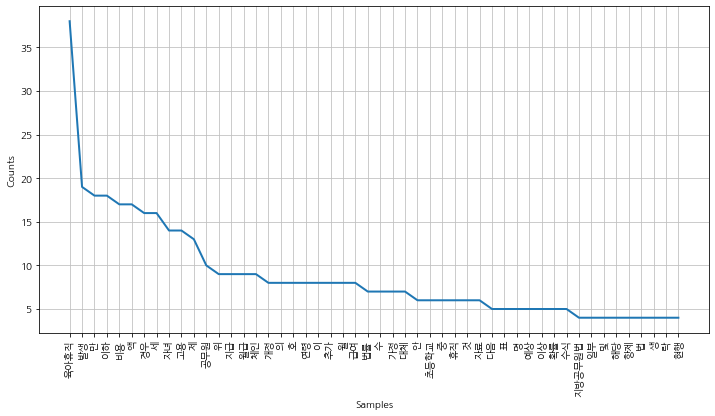

In [38]:
ko = nltk.Text(tokens_ko, name="대한민국 국회 의안 제 1809890호")
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

In [39]:
#문서에 몇 번 언금 되었는지 확인
ko.count('초등학교')

6

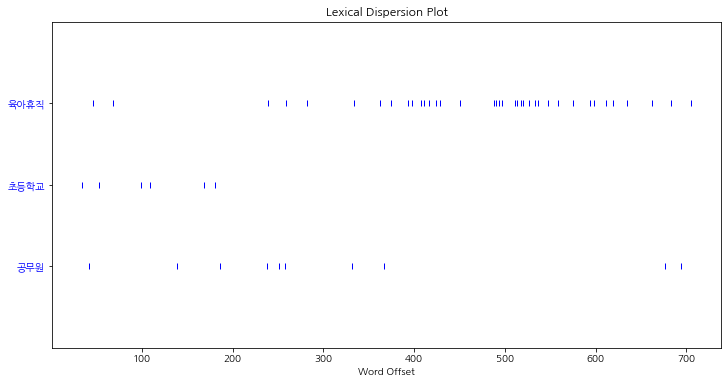

In [40]:
#원하는 단어의 문서 내 위치 개략적으로 살핌
plt.figure(figsize=(12,6))
ko.dispersion_plot(['육아휴직', '초등학교', '공무원'])

In [41]:
#원하는 단어의 주변부 단어 확인
ko.concordance('초등학교')

Displaying 6 of 6 matches:
 안규백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 위 육아
이 현재 공무원 자녀 양육 위 육아휴직 수 자녀 나이 만 세 이하 초등학교 저학년 자녀 위 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 
법률 안 지방공무원법 일부 다음 개정 제 항제 호 중 만 세 이하 초등학교 취학 전 자녀 만 세 이하 취학 중인 경우 초등학교 학년 이하 말
 만 세 이하 초등학교 취학 전 자녀 만 세 이하 취학 중인 경우 초등학교 학년 이하 말 의 자녀 로 부 칙 이 법 공포 날 시행 신 구조 
제 호 의 경우 대통령령 정 사정 직 명 생 략 현행 만 세 이하 초등학교 취 만 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학
하 초등학교 취 만 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 이하 여 여자 공무원 말 의 자녀 임신 출산 때 생 략 생 


In [42]:
#문서 내에서 어떤 단어들이 연이어 사용되었는지 확인
ko.collocations()

초등학교 저학년; 근로자 육아휴직; 육아휴직 대상자; 공무원 육아휴직


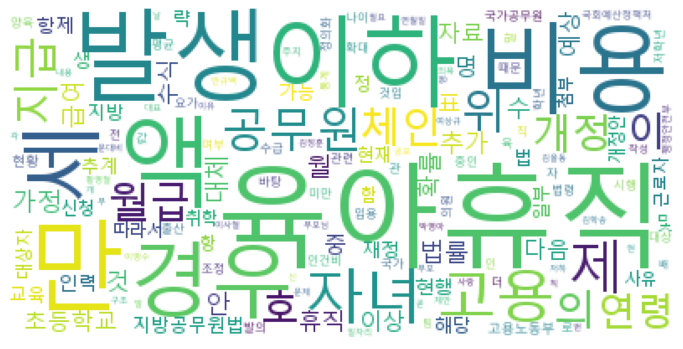

In [46]:
data = ko.vocab().most_common(150)

wordcloud = WordCloud(font_path = "c;/Windows/Fonts/malgun.ttf", 
                      relative_scaling = 0.2, background_color='white'
                     ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 4. Naive Bayes Classifier의 이해- 영문

In [48]:
from nltk.tokenize import word_tokenize
import nltk

train = [('i like you', 'pos'), 
         ('i hate you', 'neg'), 
         ('you like me', 'neg'),
         ('i like her', 'pos')]

In [49]:
#train 문장에서 사용된 전체 단어 찾기
all_words = set(word.lower() for sentence in train for word in word_tokenize(sentence[0]))

all_words

{'hate', 'her', 'i', 'like', 'me', 'you'}

In [50]:
# all_words 기준으로 train 문장에 속한 단어인지 아닌지 확인
t = [({word: (word in word_tokenize(x[0])) for word in  all_words}, x[1]) 
     for x in train]
t

[({'her': False,
   'me': False,
   'hate': False,
   'i': True,
   'you': True,
   'like': True},
  'pos'),
 ({'her': False,
   'me': False,
   'hate': True,
   'i': True,
   'you': True,
   'like': False},
  'neg'),
 ({'her': False,
   'me': True,
   'hate': False,
   'i': False,
   'you': True,
   'like': True},
  'neg'),
 ({'her': True,
   'me': False,
   'hate': False,
   'i': True,
   'you': False,
   'like': True},
  'pos')]

In [51]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                    hate = False             pos : neg    =      1.7 : 1.0
                     her = False             neg : pos    =      1.7 : 1.0
                       i = True              pos : neg    =      1.7 : 1.0
                    like = True              pos : neg    =      1.7 : 1.0
                      me = False             pos : neg    =      1.7 : 1.0
                     you = True              neg : pos    =      1.7 : 1.0


In [52]:
test_sentence = 'i like MeRui'
test_sent_features = {word.lower(): (word in word_tokenize(test_sentence.lower()))
                     for word in all_words}
test_sent_features

{'her': False,
 'me': False,
 'hate': False,
 'i': True,
 'you': False,
 'like': True}

In [54]:
classifier.classify(test_sent_features)

'pos'

## 5. Naive Bayes Classifier의 이해- 한글

In [55]:
pos_tagger = Twitter()
train = [('메리가 좋아', 'pos'), 
         ('고양이도 좋아', 'pos'),
         ('난 수업이 지루해', 'neg'),
         ('메리는 이쁜 고양이야', 'pos'),
         ('난 마치고 메리랑 놀거야', 'pos')]

In [56]:
all_words = set(word.lower() for sentence in train
               for word in word_tokenize(sentence[0]))
all_words

{'고양이도',
 '고양이야',
 '난',
 '놀거야',
 '마치고',
 '메리가',
 '메리는',
 '메리랑',
 '수업이',
 '이쁜',
 '좋아',
 '지루해'}

In [57]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
    for x in train]
t

[({'이쁜': False,
   '난': False,
   '메리는': False,
   '수업이': False,
   '고양이야': False,
   '마치고': False,
   '지루해': False,
   '놀거야': False,
   '메리랑': False,
   '메리가': True,
   '고양이도': False,
   '좋아': True},
  'pos'),
 ({'이쁜': False,
   '난': False,
   '메리는': False,
   '수업이': False,
   '고양이야': False,
   '마치고': False,
   '지루해': False,
   '놀거야': False,
   '메리랑': False,
   '메리가': False,
   '고양이도': True,
   '좋아': True},
  'pos'),
 ({'이쁜': False,
   '난': True,
   '메리는': False,
   '수업이': True,
   '고양이야': False,
   '마치고': False,
   '지루해': True,
   '놀거야': False,
   '메리랑': False,
   '메리가': False,
   '고양이도': False,
   '좋아': False},
  'neg'),
 ({'이쁜': True,
   '난': False,
   '메리는': True,
   '수업이': False,
   '고양이야': True,
   '마치고': False,
   '지루해': False,
   '놀거야': False,
   '메리랑': False,
   '메리가': False,
   '고양이도': False,
   '좋아': False},
  'pos'),
 ({'이쁜': False,
   '난': True,
   '메리는': False,
   '수업이': False,
   '고양이야': False,
   '마치고': True,
   '지루해': False,
   '놀거야': True,
   '메리랑': True,
   '메리가': F

In [58]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                       난 = True              neg : pos    =      2.5 : 1.0
                      좋아 = False             neg : pos    =      1.5 : 1.0
                    고양이도 = False             neg : pos    =      1.1 : 1.0
                    고양이야 = False             neg : pos    =      1.1 : 1.0
                     놀거야 = False             neg : pos    =      1.1 : 1.0
                     마치고 = False             neg : pos    =      1.1 : 1.0
                     메리가 = False             neg : pos    =      1.1 : 1.0
                     메리는 = False             neg : pos    =      1.1 : 1.0
                     메리랑 = False             neg : pos    =      1.1 : 1.0
                      이쁜 = False             neg : pos    =      1.1 : 1.0


In [60]:
test_sentence = '난 수업이 마치면 메리랑 놀거야'
test_sent_features = {word.lower(): (word in word_tokenize(test_sentence.lower()))
                     for word in all_words}
test_sent_features

{'이쁜': False,
 '난': True,
 '메리는': False,
 '수업이': True,
 '고양이야': False,
 '마치고': False,
 '지루해': False,
 '놀거야': True,
 '메리랑': True,
 '메리가': False,
 '고양이도': False,
 '좋아': False}

In [61]:
classifier.classify(test_sent_features)

'neg'

긍정 결과가 나와야하는데 부정 결과가 나옴 -> 형태소 분석이 필요

In [64]:
def tokenize(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

In [65]:
train_docs = [(tokenize(row[0]), row[1]) for row in train]
train_docs

[(['메리/Noun', '가/Josa', '좋다/Adjective'], 'pos'),
 (['고양이/Noun', '도/Josa', '좋다/Adjective'], 'pos'),
 (['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective'], 'neg'),
 (['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa'], 'pos'),
 (['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb'], 'pos')]

In [66]:
tokens = [t for d in train_docs for t in d[0]]
tokens

['메리/Noun',
 '가/Josa',
 '좋다/Adjective',
 '고양이/Noun',
 '도/Josa',
 '좋다/Adjective',
 '난/Noun',
 '수업/Noun',
 '이/Josa',
 '지루하다/Adjective',
 '메리/Noun',
 '는/Josa',
 '이쁘다/Adjective',
 '고양이/Noun',
 '야/Josa',
 '난/Noun',
 '마치/Noun',
 '고/Josa',
 '메리/Noun',
 '랑/Josa',
 '놀다/Verb']

In [67]:
def term_exists(doc):
    return {word: (word in set(doc)) for word in tokens}

In [68]:
train_xy = [(term_exists(d), c) for d,c in train_docs]
train_xy

[({'메리/Noun': True,
   '가/Josa': True,
   '좋다/Adjective': True,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': True,
   '고양이/Noun': True,
   '도/Josa': True,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': False,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': True,
   '수업/Noun': True,
   '이/Josa': True,
   '지루하다/Adjective': True,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Jo

In [69]:
classifier = nltk.NaiveBayesClassifier.train(train_xy)

test_sentence=[('난 수업이 마치면 메리랑 놀거야')]

test_docs = pos_tagger.pos(test_sentence[0])
test_docs

[('난', 'Noun'),
 ('수업', 'Noun'),
 ('이', 'Josa'),
 ('마치', 'Noun'),
 ('면', 'Josa'),
 ('메리', 'Noun'),
 ('랑', 'Josa'),
 ('놀거야', 'Verb')]

In [71]:
test_sent_features = {word: (word in tokens) for word in test_docs}
test_sent_features

{('난', 'Noun'): False,
 ('수업', 'Noun'): False,
 ('이', 'Josa'): False,
 ('마치', 'Noun'): False,
 ('면', 'Josa'): False,
 ('메리', 'Noun'): False,
 ('랑', 'Josa'): False,
 ('놀거야', 'Verb'): False}

In [73]:
classifier.classify(test_sent_features)

'pos'

## 6. 문장의 유사도 측정하기

In [74]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df = 1)

In [87]:
contents = ['메리랑 놀러가고 싶지만 바쁜데 어떻하죠?',
                   '메리는 공원에서 산책하고 노는 것을 싫어해요',
                   '메리는 공원에서 노는 것도 싫어해요. 이상해요.',
                   '먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요']

X = vectorizer.fit_transform(contents)
vectorizer.get_feature_names()

['것도',
 '것을',
 '곳으로',
 '공원에서',
 '그러질',
 '너무',
 '노는',
 '놀러가고',
 '떠나고',
 '메리는',
 '메리랑',
 '못하고',
 '바빠서',
 '바쁜데',
 '산책하고',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '여행을',
 '이상해요',
 '있어요']

In [88]:
t = Twitter()

contents_tokens = [t.morphs(row) for row in contents]
contents_tokens

[['메리', '랑', '놀러', '가고', '싶지만', '바쁜데', '어떻하죠', '?'],
 ['메리', '는', '공원', '에서', '산책', '하고', '노', '는', '것', '을', '싫어해요'],
 ['메리', '는', '공원', '에서', '노', '는', '것', '도', '싫어해요', '.', '이상해요', '.'],
 ['먼',
  '곳',
  '으로',
  '여행',
  '을',
  '떠나고',
  '싶은데',
  '너무',
  '바빠서',
  '그러질',
  '못',
  '하고',
  '있어요']]

In [89]:
contents_for_vectorize = []

for content in contents_tokens:
    sentence= ''
    for word in content:
        sentence = sentence + ' ' + word
    
    contents_for_vectorize.append(sentence)
    
contents_for_vectorize

[' 메리 랑 놀러 가고 싶지만 바쁜데 어떻하죠 ?',
 ' 메리 는 공원 에서 산책 하고 노 는 것 을 싫어해요',
 ' 메리 는 공원 에서 노 는 것 도 싫어해요 . 이상해요 .',
 ' 먼 곳 으로 여행 을 떠나고 싶은데 너무 바빠서 그러질 못 하고 있어요']

In [90]:
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 20)

In [82]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떡하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

In [83]:
X.toarray().transpose()

array([[1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 1]], dtype=int64)

In [92]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
    
    new_post_for_vectorize.append(sentence)

new_post_for_vectorize

[' 메리 랑 공원 에서 산책 하고 놀고 싶어요']

In [93]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)

In [94]:
new_post_vec.toarray()

array([[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]],
      dtype=int64)

In [95]:
import scipy as sp

#두 벡터의 차이를 구하고 난 결과의 norm

def dist_raw(v1, v2):
    delta = v1-v2
    return sp.linalg.norm(delta.toarray())

In [97]:
best_doc= None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f : %s" %(i, d, contents[i]))
    
    if d< best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=3.00 : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=1.00 : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=2.00 : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=3.46 : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [99]:
for i in range(0, len(contents)):
    print(X.getrow(i).toarray())
print('-------------------')
print(new_post_vec.toarray())

[[1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0]]
[[0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1]]
[[0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0]]
[[0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1]]
-------------------
[[0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]]


In [102]:
def dist_norm(v1, v2):
    v1_normalized = v1 / sp.linalg.norm(v1.toarray())
    v2_normalized = v2 / sp.linalg.norm(v2.toarray())
    
    delta = v1_normalized - v2_normalized
    
    return sp.linalg.norm(delta.toarray())

In [103]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f : %s" %(i, d, contents[i]))
    
    if d< best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=1.28 : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=0.42 : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=0.89 : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=1.30 : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [104]:
print("Best post is %i, dist = %.2f" %(best_i, best_dist))
print("-->", new_post)
print("---->", contents[best_i])

Best post is 1, dist = 0.42
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
----> 메리는 공원에서 산책하고 노는 것을 싫어해요


In [105]:
def tfidf(t,d,D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log(float(len(D)) / len([doc for doc in D if t in doc]))
    return tf, idf

In [106]:
a, abb,abc = ['a'], ['a', 'b', 'b'], ['a', 'b', 'c']
D = [a, abb, abc]

print(tfidf('a', a, D))
print(tfidf('b', abb, D))
print(tfidf('a', abc, D))
print(tfidf('b', abc, D))
print(tfidf('c', abc, D))

(1.0, 0.0)
(0.6666666666666666, 0.4054651081081644)
(0.3333333333333333, 0.0)
(0.3333333333333333, 0.4054651081081644)
(0.3333333333333333, 1.0986122886681098)


<ipython-input-105-a85fd34a843f>:3: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  idf = sp.log(float(len(D)) / len([doc for doc in D if t in doc]))


In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 1, decode_error='ignore')

In [108]:
contents_tokens = [t.morphs(row) for row in contents]

contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
    
    contents_for_vectorize.append(sentence)

X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 20)

In [109]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

In [111]:
new_post = ['근처 공원에 메리랑 놀러가고 싶네요.']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize= []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
    
    new_post_for_vectorize.append(sentence)

new_post_for_vectorize

[' 근처 공원 에 메리 랑 놀러 가고 싶네요 .']

In [113]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)

In [114]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f : %s" %(i, d, contents[i]))
    
    if d< best_dist:
        best_dist = d
        best_i = i
        
print("Best post is %i, dist = %.2f" %(best_i, best_dist))
print("-->", new_post)
print("---->", contents[best_i])

== Post 0 with dist=0.90 : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=1.18 : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=1.16 : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=1.41 : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요
Best post is 0, dist = 0.90
--> ['근처 공원에 메리랑 놀러가고 싶네요.']
----> 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?


## 7. 여자 친구 선물 고르기

In [121]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time

In [122]:
tmp1 = 'https://search.naver.com/search.naver?where=kin'
html = tmp1 + '&sm=tab_jum&ie=utf8&query={key_word}&start={num}'

response = urlopen(html.format(num=1, key_word=urllib.parse.quote('여친 선물')))

soup = BeautifulSoup(response, "html.parser")

tmp = soup.find_all('li')

In [123]:
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
    
tmp_list

['  @txt@   @date@. 삭제  ',
 '  @txt@   추가  ',
 '  @txt@   @date@. 추가  ',
 '  @query@ @intend@   추가  ',
 '통합',
 '지식iN',
 '쇼핑',
 '이미지',
 'VIEW',
 '인플루언서',
 '동영상',
 '뉴스',
 '어학사전',
 '지도',
 '도서',
 '뮤직',
 '지식백과',
 '오디오클립',
 '학술정보',
 ' 공유 ',
 '  기간  전체1시간1일1주1개월3개월6개월1년 직접입력옵션펼치기접기     기간 설정시작       기간 설정끝      년(Year)           월(Month)           일(Day)            적용    ',
 '  답변  전체eXpert전문가변호사변리사법무사노무사회계사세무사의사한의사수의사약사영양사운동전문가손해사정사경영지도사기술지도사기술사관세사지식파트너분야별 지식인지존이상   ',
 '   옵션 초기화 검색옵션 가이드   ',
 '   Q  문서 저장하기  Keep에 저장 Keep 바로가기    20대 여친 선물 ? 여자친구 생일 선물 추천좀여 20대 여친 선물 고민 중이에요.. 2주 뒤 여자친구 생일인데 선물 고민됩니다 아이디어스도 다운받아서 찾아보고 있는데 좀 비싸서ㅠ 여친이 감동받을 수 있는 선물 없을까요? 담주면 택배 마감해서 택배 빨리 받을 수 있으면 좋겠습니다     1:1  A      93is****      아직 목걸이 선물 안하셨다면, 퀴스퀴스에서 14K 탄생석 목걸이 추천드려요.. 탄생석이 셋팅되어 있어 나름 더욱더 의미있는 선물이 되리라 생각됩니다.  2022.08.30.          Q여친 선물을 잃어버렸어요... 제가 이번에 여자친구한테 쿠키 선물을 받았는데 술을 진탕 마시고 취한 상태로 있었어서..받았던건 기억이 나는데 갖고 들어온 기억이 없어요... 심지어는 거기에 편지도 있었다고 하는데... 여자친구는 잃어버린걸 모르고 있는 상태예요.. 이거 솔직하게 여자친구한테 말을 해야할까요..

In [124]:
from tqdm import tqdm_notebook

present_candi_text = []

for n in tqdm_notebook(range(1,10000,10)):
    response = urlopen(html.format(num=n, key_word = urllib.parse.quote('여자친구 선물')))
    soup = BeautifulSoup(response, "html.parser")
    tmp = soup.find_all('li')
    
    for line in tmp:
        present_candi_text.append(line.text)
    
    time.sleep(0.5)

<ipython-input-124-1a2841de01d2>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(range(1,10000,10)):


In [125]:
present_candi_text

['  @txt@   @date@. 삭제  ',
 '  @txt@   추가  ',
 '  @txt@   @date@. 추가  ',
 '  @query@ @intend@   추가  ',
 '통합',
 '쇼핑',
 '지식iN',
 '이미지',
 'VIEW',
 '인플루언서',
 '동영상',
 '뉴스',
 '어학사전',
 '지도',
 '도서',
 '뮤직',
 '지식백과',
 '오디오클립',
 '학술정보',
 ' 공유 ',
 '  기간  전체1시간1일1주1개월3개월6개월1년 직접입력옵션펼치기접기     기간 설정시작       기간 설정끝      년(Year)           월(Month)           일(Day)            적용    ',
 '  답변  전체eXpert전문가변호사변리사법무사노무사회계사세무사의사한의사수의사약사영양사운동전문가손해사정사경영지도사기술지도사기술사관세사지식파트너분야별 지식인지존이상   ',
 '   옵션 초기화 검색옵션 가이드   ',
 '   Q  문서 저장하기  Keep에 저장 Keep 바로가기    여자친구 선물 ... 제가 너무 두서없이 적었는데 정리 하자면 1. 여자친구 선물 추천 2. 딱히 다른거 추천하는게 없다면 구찌 에르메스 불리봄데 뮤제 립 중에서 선택 or 다른 립 추천 이렇게 질문하나 고수님에게 드립니다!! 정성스러운 답변 기다리겠습니다. 감사합니다.     1:1  A    종로금빵      안녕하세요~"종로금빵"입니다♡ 여자친구 선물 찾으시는군요ㅎㅎ 명품은 아니지만 혹시 "탄생석별자리 목걸이"는 어떠세요~? 여자친구 선물로 많이 나가는 제품으로 여자친구분 탄생석과 별자리를 목걸이 하나에 같이 달 수 있어 정말 의미있는 선물이 될 것 같아요~ 또 한가지 장점은 별자리를...  2022.08.30.          Q여자친구 선물 추천 부탁드려  2022.07.07.        Q여자친구 선물 추천해주세요 곧 300일이 다되어 가는데 여자친구 선물로 뭘해주면 좋을까요?  2022.01.25.       

In [126]:
t = Twitter()

present_text = ''

for each_line in present_candi_text[:10000]:
    present_text = present_text + each_line + "/n"

tokens_ko = t.morphs(present_text)
tokens_ko

['@txt',
 '@',
 '@',
 'date@.',
 '삭제',
 '/',
 'n',
 '@txt',
 '@',
 '추가',
 '/',
 'n',
 '@txt',
 '@',
 '@',
 'date@.',
 '추가',
 '/',
 'n',
 '@query',
 '@',
 '@intend',
 '@',
 '추가',
 '/',
 'n',
 '통합',
 '/',
 'n',
 '쇼핑',
 '/',
 'n',
 '지식',
 'iN',
 '/',
 'n',
 '이미지',
 '/',
 'nVIEW',
 '/',
 'n',
 '인',
 '플루',
 '언',
 '서',
 '/',
 'n',
 '동영상',
 '/',
 'n',
 '뉴스',
 '/',
 'n',
 '어학',
 '사전',
 '/',
 'n',
 '지도',
 '/',
 'n',
 '도서',
 '/',
 'n',
 '뮤직',
 '/',
 'n',
 '지식',
 '백',
 '과',
 '/',
 'n',
 '오디오',
 '클립',
 '/',
 'n',
 '학술',
 '정보',
 '/',
 'n',
 '공유',
 '/',
 'n',
 '기간',
 '전체',
 '1시간',
 '1일',
 '1',
 '주',
 '1',
 '개월',
 '3',
 '개월',
 '6',
 '개월',
 '1년',
 '직접',
 '입력',
 '옵션',
 '펼치기',
 '접기',
 '기간',
 '설정',
 '시작',
 '기간',
 '설정',
 '끝',
 '년',
 '(',
 'Year',
 ')',
 '월',
 '(',
 'Month',
 ')',
 '일',
 '(',
 'Day',
 ')',
 '적용',
 '/',
 'n',
 '답변',
 '전체',
 'eXpert',
 '전문가',
 '변호사',
 '변리사',
 '법무사',
 '노무사',
 '회계사',
 '세무사',
 '의',
 '사',
 '한의사',
 '수의사',
 '약',
 '사',
 '영양사',
 '운동',
 '전문가',
 '손해사정사',
 '경영지도사',
 '기술지도사',
 '기술사',
 '

In [127]:
ko = nltk.Text(tokens_ko, name = "여자친구 선물")
print(len(ko.tokens))
print(len(set(ko.tokens)))

413578
784


In [128]:
ko = nltk.Text(tokens_ko, name = "여자친구 선물")
ko.vocab().most_common(100)

[('선물', 15460),
 ('.', 13800),
 ('여자친구', 13400),
 ('/', 10600),
 ('n', 10400),
 ('이', 5800),
 ('로', 5000),
 ('Q', 4200),
 ('에', 4200),
 ('저장', 4000),
 ('Keep', 4000),
 ('추천', 3800),
 ('가', 3600),
 ('\n\n', 3600),
 (',', 3516),
 ('1', 3400),
 ('\n\n\n\n', 3200),
 ('?', 3000),
 ('목걸이', 2600),
 ('!', 2600),
 ('요', 2400),
 ('을', 2351),
 ('...', 2200),
 ('꽃', 2200),
 ('\n', 2200),
 ('문서', 2000),
 ('하기', 2000),
 ('바로가기', 2000),
 ('1:1', 2000),
 ('A', 2000),
 ('20', 2000),
 ('대', 2000),
 ('개월', 1800),
 ('생일', 1800),
 ('를', 1600),
 ('MSM', 1600),
 ('@', 1400),
 ('제', 1400),
 ('안녕하세요', 1400),
 ('으로', 1400),
 ('~', 1400),
 ('..', 1400),
 ('좀', 1400),
 ('꽃다발', 1400),
 ('서비스', 1400),
 ('향수', 1400),
 ('\n\n\n', 1400),
 ('네이버', 1400),
 ('퍼펙트', 1400),
 ('가격', 1309),
 ('3', 1200),
 ('입니다', 1200),
 ('있는', 1200),
 ('것', 1200),
 ('좋을까요', 1200),
 ('뭐', 1200),
 ('도', 1200),
 ('이전', 1200),
 ('다음', 1200),
 ('관련', 1200),
 ('****', 1200),
 ('감동', 1200),
 ('온', 1200),
 ('\n\n\n\n\n\n', 1200),
 ('에서', 1000),
 ('

In [139]:
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도',
              '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
              '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
              '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
              '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
              '지','있','못','후','중','줄','6','과','어떤','기본','!!',
              '단어','선물해','라고','중요한','합','가요','....','보이','네','무지',
              'Q', 'n', '/', 'keep', '\n\n', '\n\n\n\n', '!', '1:1', 'A','개월','MSM',
              '@', '\n\n\n', '****', '\n\n\n\n\n\n', '"', '건', '하기', '3', '에서',
             '\n', '바로가기', '문서', '온', '\n\n\n\n\n\n\n\n\n','\n\n\n\n                \n                ',
             '(', ')','인']

tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name = "여자친구 선물")
ko.vocab().most_common(50)

[('선물', 15460),
 ('여자친구', 13400),
 ('저장', 4000),
 ('Keep', 4000),
 ('추천', 3800),
 ('목걸이', 2600),
 ('꽃', 2200),
 ('생일', 1800),
 ('안녕하세요', 1400),
 ('꽃다발', 1400),
 ('서비스', 1400),
 ('향수', 1400),
 ('네이버', 1400),
 ('퍼펙트', 1400),
 ('가격', 1309),
 ('입니다', 1200),
 ('좋을까요', 1200),
 ('이전', 1200),
 ('다음', 1200),
 ('관련', 1200),
 ('감동', 1200),
 ('탄생석', 1000),
 ('30', 1000),
 ('생각', 1000),
 ('고민', 1000),
 ('새벽', 1000),
 ('당일', 1000),
 ('좋은', 1000),
 ('함께', 1000),
 ('하고', 1000),
 ('레인', 1000),
 ('필드', 1000),
 ('광고', 1000),
 ('아이디', 1000),
 ('보기', 1000),
 ('너무', 800),
 ('의미', 800),
 ('같아요', 800),
 ('2022.08', 800),
 ('2022.07', 800),
 ('곧', 800),
 ('뭘', 800),
 ('2022.06', 800),
 ('랑', 800),
 ('있을까요', 800),
 ('말고', 800),
 ('✿', 800),
 ('배달', 800),
 ('시', 800),
 ('오래', 800)]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 10047 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 10047 missing from current font.
  font.set_text(s, 0, flags=flags)


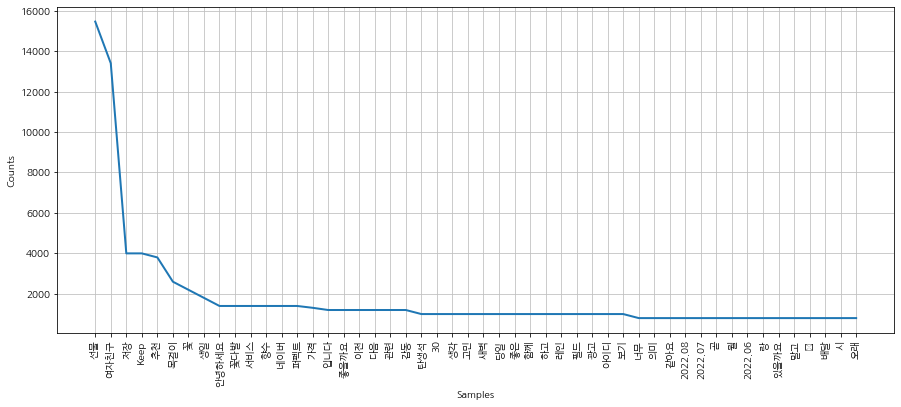

In [140]:
plt.figure(figsize = (15,6))
ko.plot(50)
plt.show()

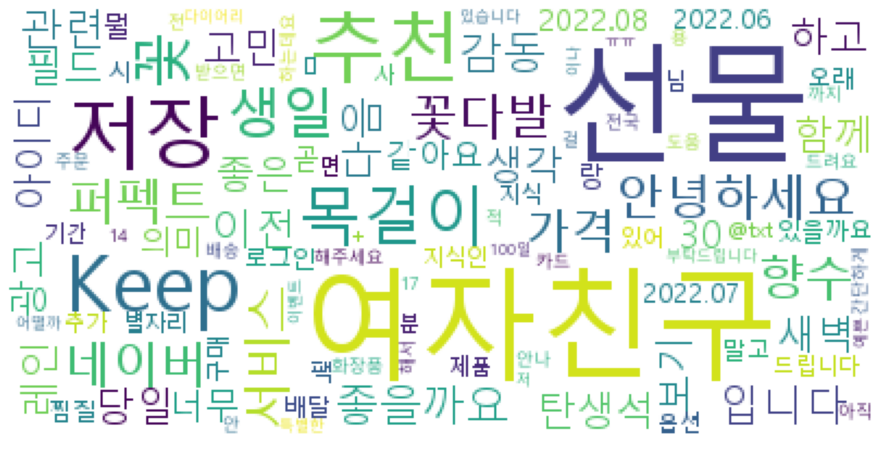

In [141]:
data = ko.vocab().most_common(300)

wordcloud = WordCloud(font_path = "c;/Windows/Fonts/malgun.ttf", 
                      relative_scaling = 0.5, background_color='white'
                     ).generate_from_frequencies(dict(data))

plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [142]:
mask = np.array(Image.open("C:/Users/Yeji/Downloads/09. heart.jpg"))

from wordcloud import ImageColorGenerator

image_colors = ImageColorGenerator(mask)

In [143]:
data = ko.vocab().most_common(200)

wordcloud = WordCloud(font_path = "c;/Windows/Fonts/malgun.ttf", 
                      relative_scaling = 0.1, mask = mask,
                      background_color='white', min_font_size = 1,
                      max_font_size = 100).generate_from_frequencies(dict(data))
default_colors = wordcloud.to_array() 

<function matplotlib.pyplot.show(close=None, block=None)>

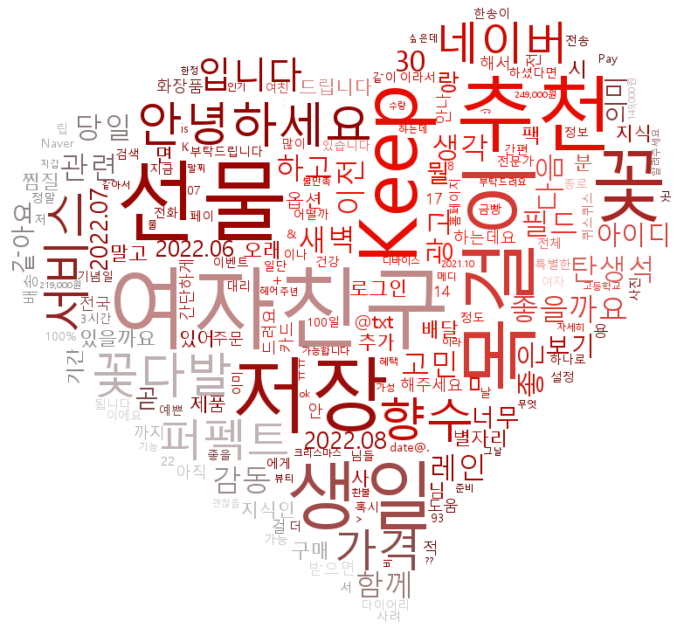

In [144]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation = 'bilinear')
plt.axis('off')
plt.show